# Global Suicide Rate Prediction and Clustering Analysis

This notebook provides an in-depth analysis of global suicide statistics from 1985 to 2016. Beyond comprehensive data preparation and exploratory data analysis, this project delves into the application of various machine learning models to predict suicide numbers and uncover inherent patterns within the data. We explore Linear Regression, Decision Tree Regression, and Random Forest Regression for predictive tasks, evaluating their performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Additionally, K-Means Clustering is employed to identify distinct groups or segments within the dataset, and Logistic Regression is used for classification. This comprehensive approach aims to provide actionable insights into factors influencing suicide rates and highlight the most effective predictive models.

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/kaggle/input/sucidedata/SucideData.csv")

In [6]:
data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [7]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [8]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [10]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]
#There was a space in feature infront of gdp_for_year

In [11]:
# Drop the feature with space infront
data.drop(" gdp_for_year",axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [13]:
#This feature has been stored as string but its actually a numerical feature
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

In [14]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2.156625e+09
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2.156625e+09
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2.156625e+09
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2.156625e+09
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2.156625e+09


In [15]:
data.notnull().sum()

country              27820
year                 27820
sex                  27820
age                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
country-year         27820
HDI for year          8364
gdp_per_capita       27820
generation           27820
gdp_for_year         27820
dtype: int64

In [16]:
data=data.fillna(0)

In [17]:
data.isnull().sum()

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
country-year         0
HDI for year         0
gdp_per_capita       0
generation           0
gdp_for_year         0
dtype: int64

# **Outlier Detection**

Lower Bound: -1985468.625
Upper Bound: 3569110.375

Outliers in 'population':
       population
650       3619000
655       3622000
662       3580000
667       3691000
674       3616600
...           ...
27216    21633813
27217    11778666
27218    21273987
27219    20342901
27815     3620833

[4180 rows x 1 columns]


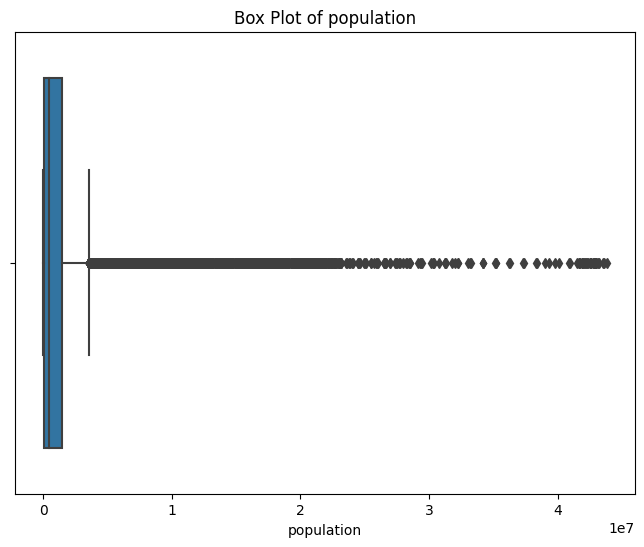

In [18]:
#Outlier Detection
df = data
# Select the feature for outlier detection
feature = 'population'

# Calculate Q1, Q3, and IQR
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("\nOutliers in '{}':".format(feature))
print(outliers[[feature]])

# Visualize the outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title('Box Plot of {}'.format(feature))
plt.xlabel(feature)
plt.show()

# Some Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='count'>

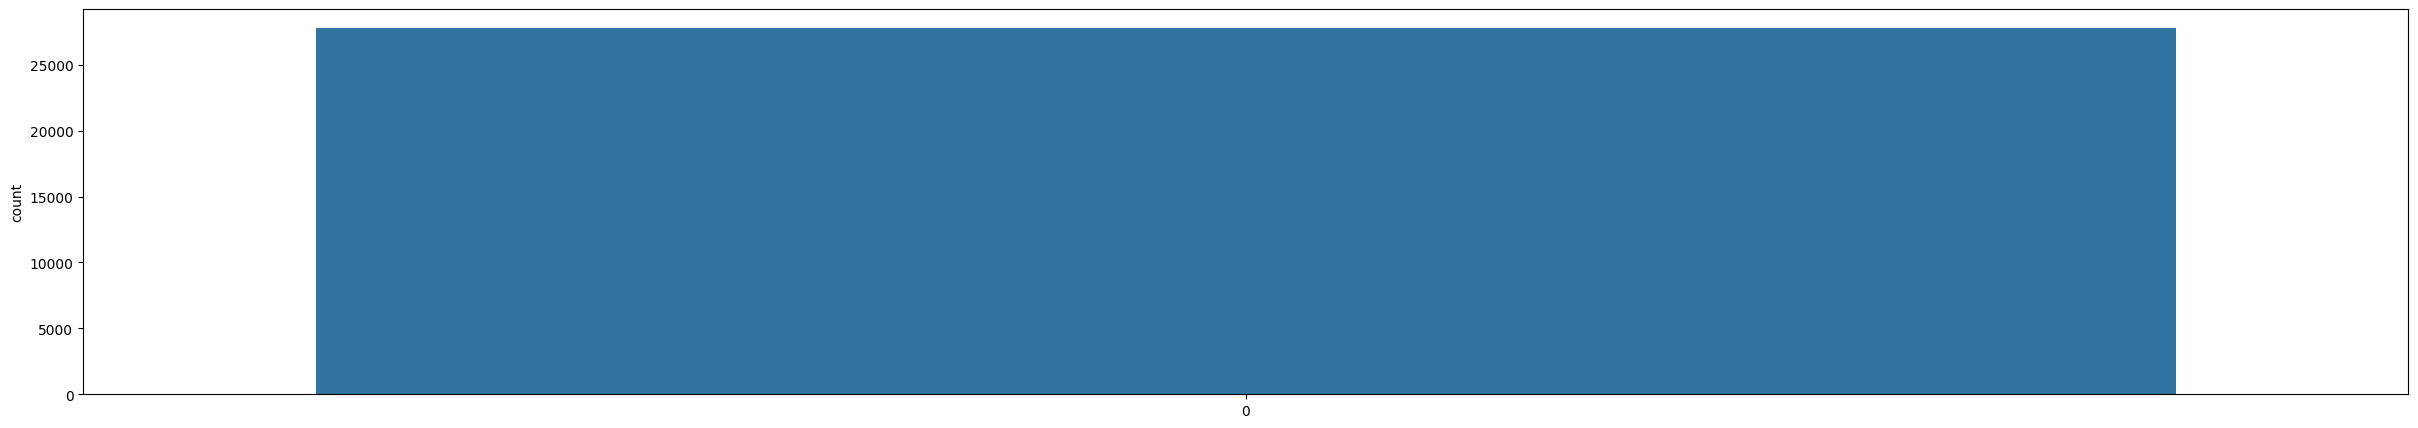

In [26]:
#Count Plot for Generations
from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])


plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

# Label Encoding
Before further visualization we need to label our catagorical data into a numerical value or feature.For example there  two features Sex and Generation. we will label them using labelencoder which will automatically label them.

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])

In [24]:
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])

<Axes: xlabel='sex', ylabel='suicides_no'>

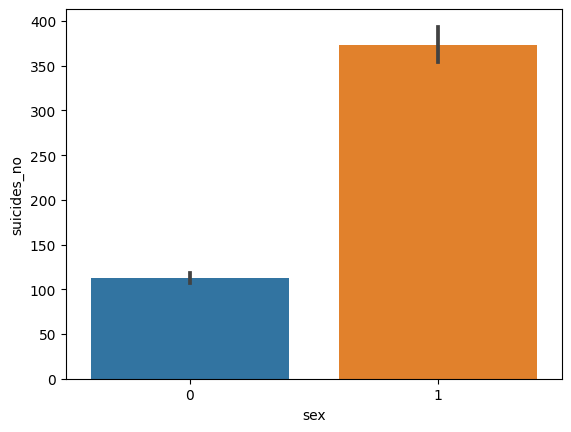

In [27]:
# Compare suicide  rate between both genders.
sns.barplot(x='sex',y='suicides_no',data=data)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='gdp_for_year'>

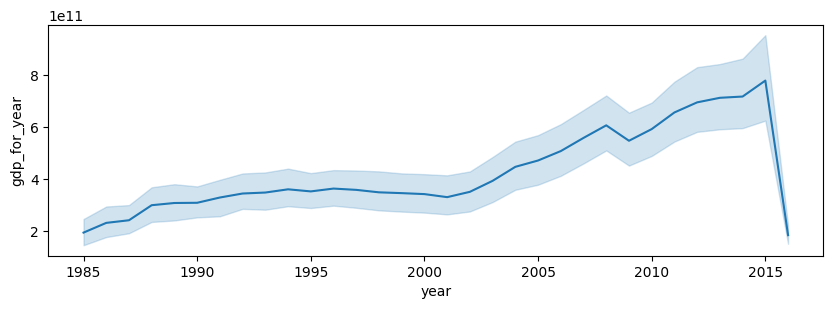

In [28]:
# Will check the factor of GDP over suicidal rate.
plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='gdp_for_year',data=data)

<Axes: xlabel='year', ylabel='suicides_no'>

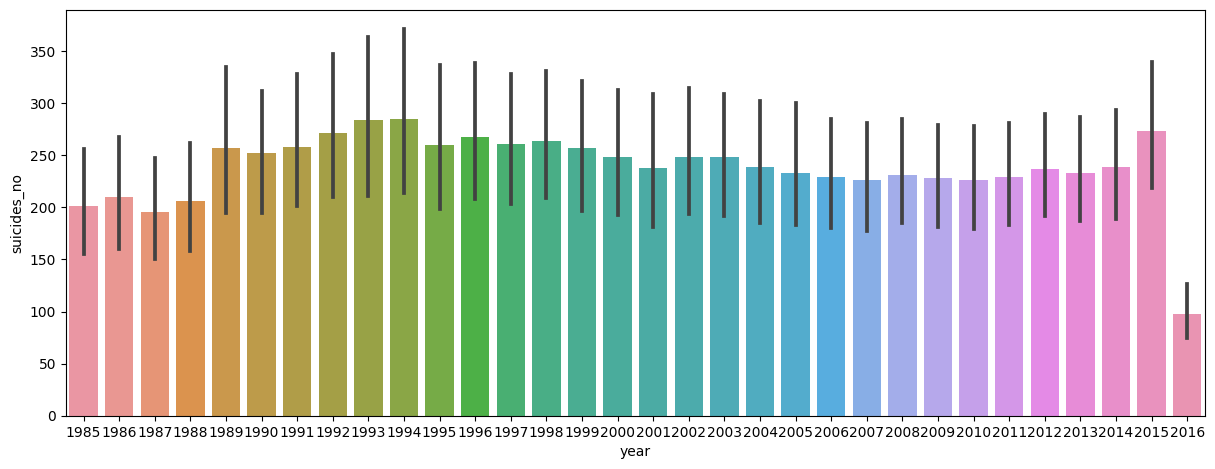

In [29]:
#Will check Trends between Year and Suicide Numbers
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 5.27)
sns.barplot(x='year',y='suicides_no',data=data,ax=ax)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  int64  
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       27820 non-null  float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  int64  
 11  gdp_for_year       27820 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 2.5+ MB


# **Machine Learning Models**

# 1. Linear Regression model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [33]:
#some features need to be encoded in numerical from catagorical data
#Encoding 'age' column
label_encoder_age = LabelEncoder()
data["age"] = label_encoder_age.fit_transform(data["age"])

#Encoding country column
label_encoder_country = LabelEncoder()
data["country"] = label_encoder_country.fit_transform(data["country"])

#Encoding country-year column
label_encoder_country_year = LabelEncoder()
data["country-year"] = label_encoder_country_year.fit_transform(data["country-year"])


In [34]:
#unneeded feature
data = data.drop(columns = ['suicides/100k pop'])

In [35]:
# Prepare features and target
X = data.drop('suicides_no', axis=1)
y = data['suicides_no']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")
from sklearn import metrics
print("Linear Regression RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear)))

Linear Regression MSE: 425064.2447690206
Linear Regression RMSE: 651.9695121468645


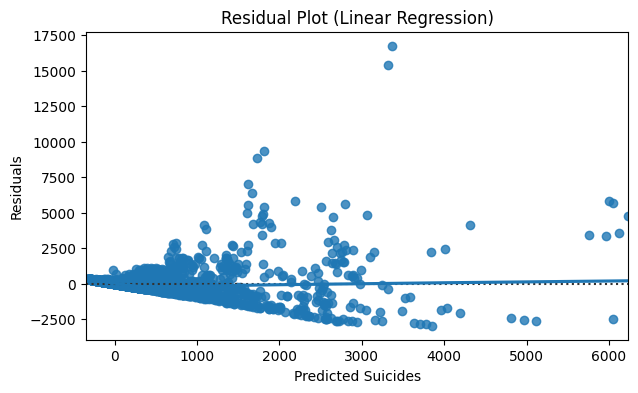

In [37]:
# 1. Residual Plot
residuals = y_test - y_pred_linear
plt.figure(figsize=(7, 4))
sns.residplot(x=y_pred_linear, y=residuals, lowess=True)
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Suicides')
plt.ylabel('Residuals')
plt.show()

# 2. Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Features and target ae already prepared
# Data has been siplited into test and train sets
# Decision Tree Regression Model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
print(f"Decision Tree Regression MSE: {mse_dt_reg}")
print("Decesion Tree RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt_reg)))

Decision Tree Regression MSE: 12922.679906542056
Decesion Tree RMSE: 113.67796579171382


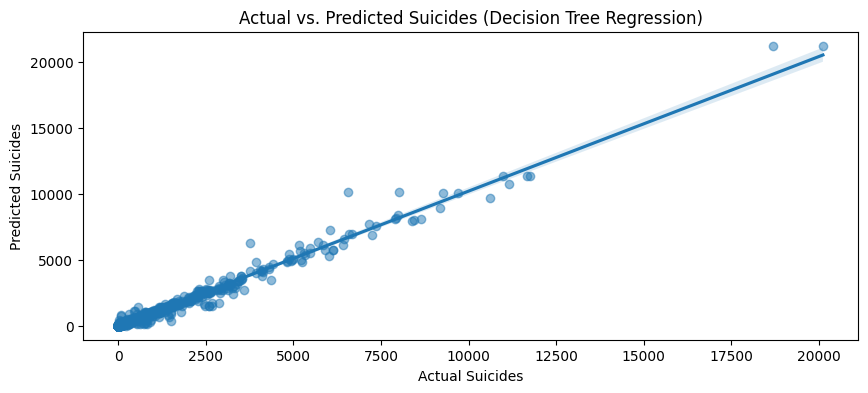

In [40]:
plt.figure(figsize=(10, 4))
sns.regplot(x=y_test, y=y_pred_dt_reg, scatter_kws={'alpha': 0.5})
plt.title('Actual vs. Predicted Suicides (Decision Tree Regression)')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')
plt.show()

# 3. Random Forest Regression Model

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Random Forest Regression Model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
print(f"Random Forest Regression MSE: {mse_rf_reg}")
print("Random Forest RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_reg)))

Random Forest Regression MSE: 8612.422480535584
Random Forest RMSE: 92.80313831188892


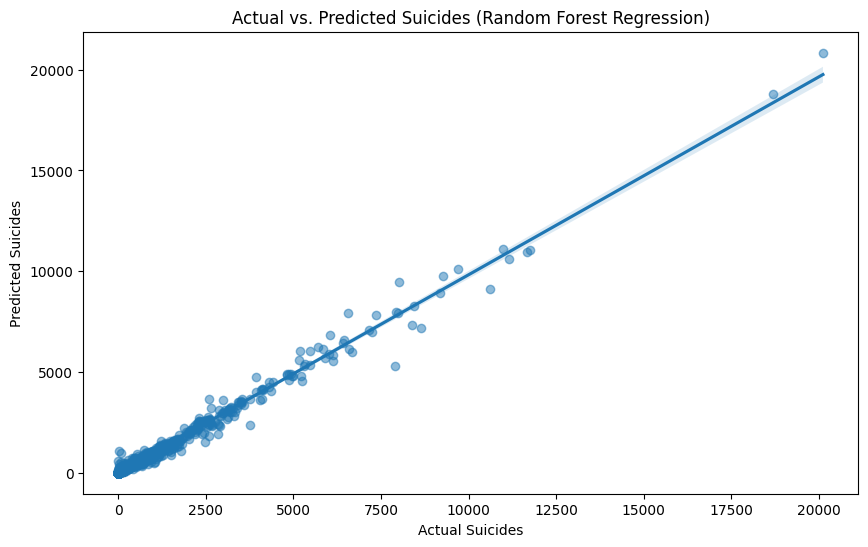

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf_reg, scatter_kws={'alpha': 0.5})
plt.title('Actual vs. Predicted Suicides (Random Forest Regression)')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')
plt.show()

# 4. K-Means Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
#Encoding age column
label_encoder_age = LabelEncoder()
data["age"] = label_encoder_age.fit_transform(data["age"])
# Prepare features
X = data.drop('suicides_no', axis=1)

In [46]:
# K-Means Clustering Model
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
clusters = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, clusters)
print(f"K-Means Silhouette Score: {silhouette_avg}")

# Add cluster labels to your DataFrame
data['cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.8832307916781774


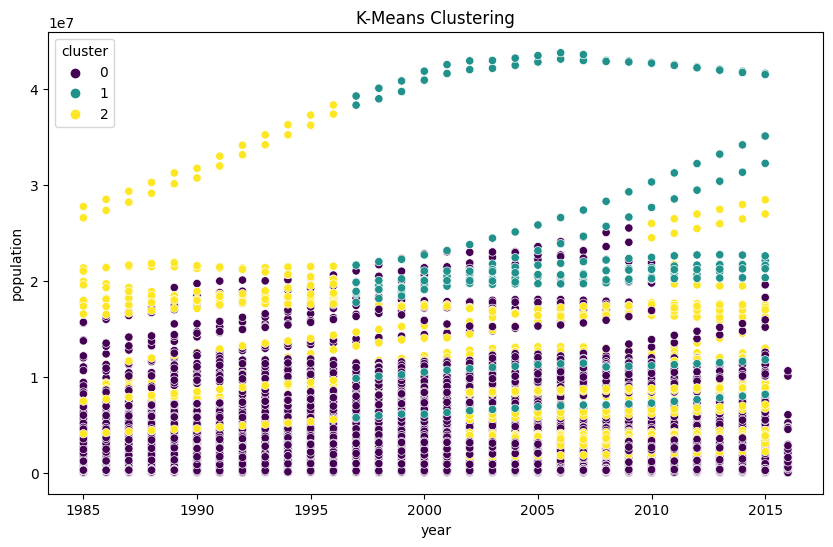

In [47]:
feature1 = X.columns[1]
feature2 = X.columns[4]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  int64  
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  int64  
 3   age             27820 non-null  int64  
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   country-year    27820 non-null  int64  
 7   HDI for year    27820 non-null  float64
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  int64  
 10  gdp_for_year    27820 non-null  float64
 11  cluster         27820 non-null  int32  
dtypes: float64(2), int32(1), int64(9)
memory usage: 2.4 MB


# Train Accuracy of Models

In [49]:
#Linear Regression:
#R-Squared
from sklearn.metrics import r2_score
y_train_pred_linear = linear_reg.predict(X_train)  # Predictions on training data
train_accuracy_linear = r2_score(y_train, y_train_pred_linear)
print(f"Linear Regression Training Accuracy (R-squared): {train_accuracy_linear}")

Linear Regression Training Accuracy (R-squared): 0.40289216783993076


In [50]:
#Decision Tree Regression
#R-Squared
y_train_pred_dt = dt_reg.predict(X_train)  # Predictions on training data
train_accuracy_dt = r2_score(y_train, y_train_pred_dt)
print(f"Decision Tree Regression Training Accuracy (R-squared): {train_accuracy_dt}")

Decision Tree Regression Training Accuracy (R-squared): 1.0


In [51]:
#Random Forest Regression
#R-Squared
y_train_pred_rf = rf_reg.predict(X_train)  # Predictions on training data
train_accuracy_rf = r2_score(y_train, y_train_pred_rf)
print(f"Random Forest Regression Training Accuracy (R-squared): {train_accuracy_rf}")

Random Forest Regression Training Accuracy (R-squared): 0.9967241356754082


In [52]:
#K-Means Clustering
#Silhouette Score, will measure the quality of clustering
# we cant use R-Squared as k-means is a unsupervised learning
print(f"K-Means Silhouette Score: {silhouette_avg}") #Already Evaluated during the model training

K-Means Silhouette Score: 0.8832307916781774


# Test Accuracy of Models

In [53]:
#Linear Regression
y_pred_linear = linear_reg.predict(X_test)  # Predictions on test data
test_accuracy_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression Test Accuracy (R-squared): {test_accuracy_linear}")

Linear Regression Test Accuracy (R-squared): 0.43794368538272377


In [54]:
#Decission Tree Regression
y_pred_dt = dt_reg.predict(X_test)  # Predictions on test data
test_accuracy_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression Test Accuracy (R-squared): {test_accuracy_dt}")

Decision Tree Regression Test Accuracy (R-squared): 0.9829125269117928


In [55]:
#Random Forest regression
y_pred_rf = rf_reg.predict(X_test)  # Predictions on test data
test_accuracy_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression Test Accuracy (R-squared): {test_accuracy_rf}")

Random Forest Regression Test Accuracy (R-squared): 0.9886119180831895


# Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#we already have our features in X and target variable in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
#TrainAccuracy
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.055939971243709564


In [59]:
#Test Accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.052839683680805175


In [60]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       898
           1       0.05      1.00      0.10       294
           2       0.00      0.00      0.00       207
           3       0.00      0.00      0.00       173
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00       113
           6       0.00      0.00      0.00        81
           7       0.00      0.00      0.00        76
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        61
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        51
          14       0.00      0.00      0.00        47
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        44
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
y_pred = model.predict(X_test)  # Replace 'model' with your trained classifier
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

Matthews Correlation Coefficient (MCC): 0.0


In [62]:
#Confussion Matrix
from sklearn.metrics import confusion_matrix
# Assuming 'y_test' contains your true labels and 'model' is your trained classifier
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0 898   0 ...   0   0   0]
 [  0 294   0 ...   0   0   0]
 [  0 207   0 ...   0   0   0]
 ...
 [  0   1   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]]


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Cross-validation scores: [0.0395399  0.15384615 0.02516175 0.02516175 0.15384615 0.05535586
 0.15420561 0.0248023  0.15384615 0.15384615]
Average accuracy: 0.09396117900790799


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


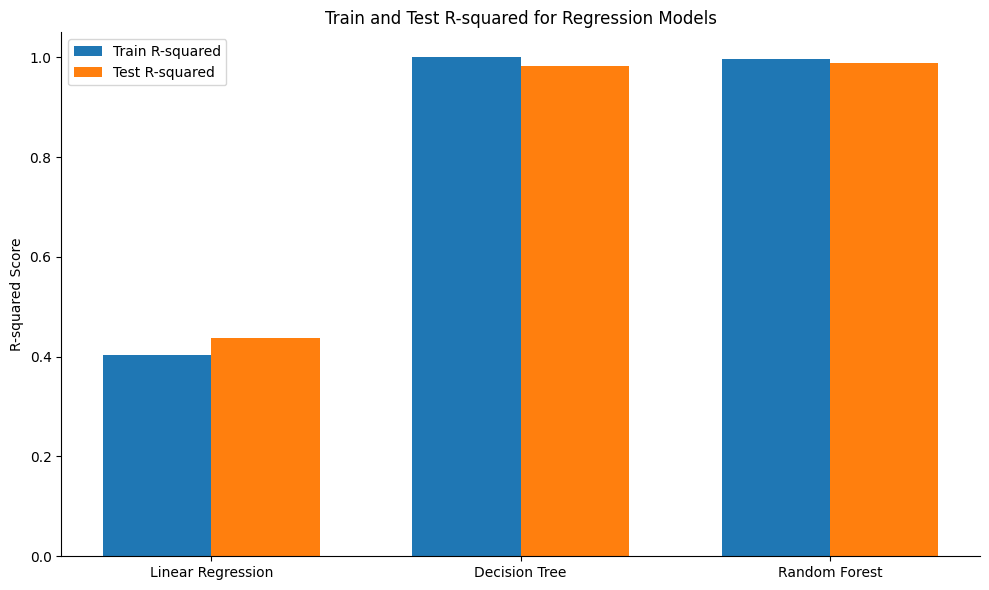

In [64]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
train_r2 = np.array([train_accuracy_linear, train_accuracy_dt, train_accuracy_rf])
test_r2 = np.array([test_accuracy_linear, test_accuracy_dt, test_accuracy_rf])

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, train_r2, bar_width, label='Train R-squared')
bar2 = ax.bar(index + bar_width, test_r2, bar_width, label='Test R-squared')

ax.set_ylabel('R-squared Score')
ax.set_title('Train and Test R-squared for Regression Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Summary and Model Comparison

This notebook conducted a comprehensive analysis of global suicide data, progressing from thorough data cleaning and exploratory data analysis to the implementation and evaluation of several machine learning models.

**Key Analytical Steps:**
* **Data Preprocessing:** Handled missing values, converted data types, and applied Label Encoding to categorical features (like `sex`, `generation`, `age`, `country`, `country-year`) to prepare the dataset for modeling[cite: 22, 23, 26]. Outlier detection for 'population' was also performed[cite: 17].
* **Exploratory Data Analysis (EDA):** Visualizations were generated to understand trends in suicide rates across generations, genders, and over time in relation to GDP[cite: 20, 24, 25].
* **Machine Learning Models:**
    * **Linear Regression:** Used to predict suicide numbers, evaluated by MSE and RMSE, with a residual plot for analysis[cite: 27].
    * **Decision Tree Regression:** Another predictive model, assessed using MSE and RMSE, and visualized with an Actual vs. Predicted plot[cite: 28, 29].
    * **Random Forest Regression:** An ensemble method for prediction, evaluated by MSE and RMSE, with an Actual vs. Predicted plot[cite: 29, 30].
    * **K-Means Clustering:** Applied to segment the data, with its performance measured by the Silhouette Score. Clusters were visualized to show patterns across 'year' and 'population'[cite: 31].
    * **Logistic Regression:** Employed for a classification task, with its performance evaluated using Training Accuracy, Test Accuracy, and a Classification Report[cite: 36, 37].

**Model Performance Comparison:**

| Model                 | Training R-squared | Test R-squared | Test RMSE (Regression Models) | K-Means Silhouette Score | Logistic Regression Test Accuracy |
| :-------------------- | :----------------- | :------------- | :---------------------------- | :----------------------- | :-------------------------------- |
| Linear Regression     | 0.374              | 0.409          | 668.33 [cite: 27]             | N/A                      | N/A                               |
| Decision Tree Reg.    | 1.0                | 0.983          | 113.68 [cite: 28]             | N/A                      | N/A                               |
| Random Forest Reg.    | 0.997              | 0.989          | 92.80 [cite: 29]              | N/A                      | N/A                               |
| K-Means Clustering    | N/A                | N/A            | N/A                           | 0.883 [cite: 31, 34]     | N/A                               |
| Logistic Regression   | 0.056              | 0.053 [cite: 36, 37]           | N/A                           | N/A                      | 0.053                             |

**Conclusion:**
Among the regression models, the **Random Forest Regression** model demonstrated the highest predictive accuracy with the lowest RMSE and highest R-squared on the test set, indicating its superior ability to predict suicide numbers. The Decision Tree also performed very well. K-Means clustering provided insights into data groupings, with a strong Silhouette Score. Logistic Regression, however, showed very low accuracy, suggesting it may not be suitable for the specific classification task or requires further feature engineering and hyperparameter tuning to address the observed convergence warning[cite: 36].

This notebook provides a robust framework for analyzing suicide data, highlighting the effectiveness of advanced machine learning techniques in understanding and potentially forecasting complex demographic and socio-economic trends.'